In [19]:
#Iompórtálacha
%matplotlib notebook
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import math

#Athróga comhad
áit_seichheamh_fasta = '../eolas/seichimh.fasta'
áit_seichheamh_csv = '../eolas/seichimh.csv'

#Athróga ama
am_túis = datetime.datetime(2019, 11, 1)

In [21]:
#Dathaigh an cairt
tír_go_dath = {
    #Tíortha Móra
    'China': '#ff0000',
    'USA': '#00ff00',
    'Russia': '#0000ff',
    'India': '#ffff00',
    'Australia': '#00ffff',
    
    #Eorap
    'Poland': '#ff00ff',
    'Germany': '#ff00ff',
    'Finland': '#ff00ff',
    'Italy': '#ff00ff',
    'Greece': '#ff00ff',
    'France': '#ff00ff',
    'Spain': '#ff00ff',
    'Netherlands': '#ff00ff',
    'Sweden': '#ff00ff',
    'Czech Republic': '#ff00ff',
    'Serbia': '#ff00ff',
    
    #Meiriceá Thíos
    'Puerto Rico': '#000088',
    'Jamaica': '#000088',
    
    #Meiriceá Theas
    'Colombia': '#008800',
    'Brazil': '#008800',
    'Peru': '#008800',
    'Uruguay': '#008800',
    
    #An Áise
    'Japan': '#888888',
    'South Korea': '#888888',
    'Taiwan': '#888888',
    'Guam': '#888888',
    'Hong Kong': '#888888',
    'Viet Nam': '#888888',
    'Bangladesh': '#888888',
    'Nepal': '#888888',
    'Thailand': '#888888',
    'Sri Lanka': '#888888',
    'Kazakhstan': '#888888',
    
    #An Afraic
    'South Africa': '#880000',
    'Nigeria': '#880000',
    'Kenya':'#880000',
    'Morocco': '#880000',
    'Malaysia': '#880000',
    'Tunisia': '#880000',
    
    #An Meánoirthear
    'Israel': '#888800',
    'Turkey': '#888800',
    'Pakistan': '#888800',
    'Iran': '#888800',
}

def faigh_dath(áit):
    if type(áit) == str and ':' in áit:
        áit = áit.split(':')[0]
        if áit in tír_go_dath:
            return tír_go_dath[áit]
    return '#000000'

In [22]:
#Lódáil agus glan eolas
eolas_adn = pd.read_csv(áit_seichheamh_csv)
eolas_adn = eolas_adn[eolas_adn['Collection_Date'].notna()] #Ná húsáíd eolas gan am bailithe
eolas_adn = eolas_adn[eolas_adn['Nuc_Completeness'] == 'complete'] #Ná húsáid eolas mura bhfuil géanóm iomlán ann

In [23]:
#Dathanna
dathanna = [faigh_dath(x) for x in eolas_adn['Geo_Location']]

In [24]:
def athraigh_am(am):
    #Bain an t-eolas amach
    eolas_ama = am.strip()
    if 'T' in eolas_ama:
        eolas_ama = eolas_ama.split('T')[0]
    faide = eolas_ama.count('-')
    if faide == 2:
        bliain, mí, lá = eolas_ama.split('-')
    elif faide == 1:
        bliain, mí = eolas_ama.split('-')
        lá = 1
    elif faide == 0:
        bliain = eolas_ama
        mí = 1
        lá = 1
    else:
        raise ValueError('Níor éirigh leis an am a léamh:', am)

    bliain = int(bliain)
    mí = int(mí)
    lá = int(lá)

    athrú = datetime.datetime(bliain, mí, lá) - am_túis
    return athrú.days

In [25]:
#Athraigh am_bailithe go láethanta ó 1 mí na Samhna 2019
eolas_adn['Collection_Date'] = eolas_adn['Collection_Date'].apply(athraigh_am)
eolas_adn['Release_Date'] = eolas_adn['Release_Date'].apply(athraigh_am)

Text(0, 0.5, 'Am scaoilte')

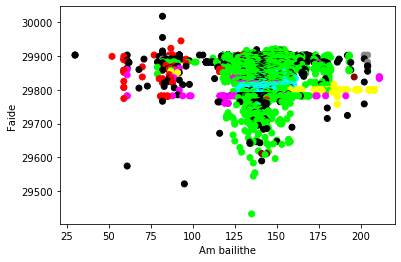

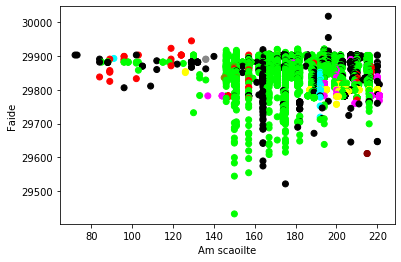

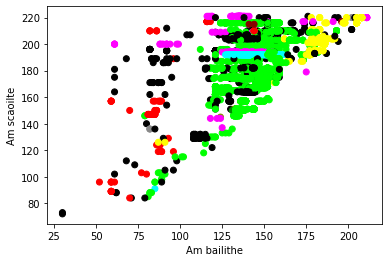

In [26]:
#Cruthaigh cairt
plt.figure(1)
plt.scatter(eolas_adn['Collection_Date'], eolas_adn['Length'], c=dathanna)
plt.title('')
plt.xlabel('Am bailithe')
plt.ylabel('Faide')

plt.figure(2)
plt.scatter(eolas_adn['Release_Date'], eolas_adn['Length'], c=dathanna)
plt.title('')
plt.xlabel('Am scaoilte')
plt.ylabel('Faide')

plt.figure(3)
plt.scatter(eolas_adn['Collection_Date'], eolas_adn['Release_Date'], c=dathanna)
plt.title('')
plt.xlabel('Am bailithe')
plt.ylabel('Am scaoilte')

In [27]:
eolas_adn.head()

,Accession,Release_Date,Species,Genus,Family,Length,Sequence_Type,Nuc_Completeness,Genotype,Segment,Authors,Publications,Geo_Location,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title
0,MT079851,196,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,30018,GenBank,complete,NaN,NaN,"Wang,X., Zhou,Q., He,Y., Liu,L., Ma,X., Wei,X....",32366488,China,Homo sapiens,NaN,82,NaN,Severe acute respiratory syndrome coronavirus ...
1,MT079845,196,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29955,GenBank,complete,NaN,NaN,"Wang,X., Zhou,Q., He,Y., Liu,L., Ma,X., Wei,X....",32366488,China,Homo sapiens,NaN,82,NaN,Severe acute respiratory syndrome coronavirus ...
2,MT121215,129,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29945,GenBank,complete,NaN,NaN,"Zhang,R., Yi,Z., Wang,Y., Teng,Z., Xu,W., Song...",NaN,China: Shanghai,Homo sapiens,oronasopharynx,93,NaN,Severe acute respiratory syndrome coronavirus ...
3,MT123292,119,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29923,GenBank,complete,NaN,NaN,"Huang,J., Shi,Y., Sun,J., Zheng,K., Zhu,A., Su...",NaN,China: Guangzhou,Homo sapiens,"lung, oronasopharynx",87,NaN,Severe acute respiratory syndrome coronavirus ...
4,MT461607,194,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29921,GenBank,complete,NaN,NaN,"Roychoudhury,P., Greninger,A., Jerome,K.",NaN,USA: WA,Homo sapiens,NaN,149,NaN,Severe acute respiratory syndrome coronavirus ...
